## Classification using Ensemble methods (Moon data)


## 1. Setup

In [1]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## 2. Fetch, Load and Visualize data

### 2.1 Fetch data from sklearn datasets

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)


### 2.2 Split dataset to train and test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3 Visualize data

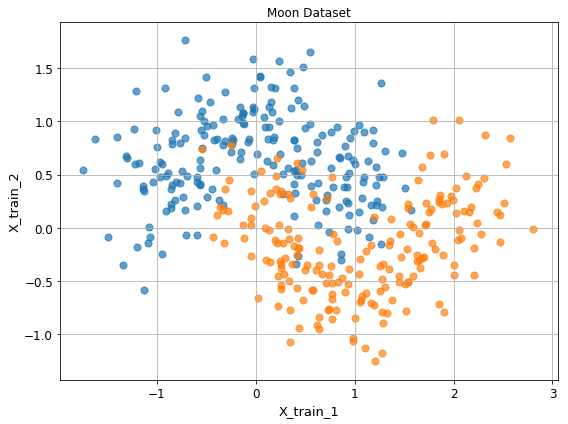

In [13]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(X_train[:,0][y_train==0],X_train[:,1][y_train==0], s=50, alpha=0.7)
ax.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1], s=50, alpha=0.7)

ax.set_xlabel('X_train_1', fontsize=13)
ax.set_ylabel('X_train_2', fontsize=13)
ax.set_title('Moon Dataset')

ax.grid(True)
fig.tight_layout()
plt.show()

## 3. Training Model : Logistic Regression 

### 3.1 Logistic Classifier

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y):
    x1s = np.linspace(-1.5,  2.5, 100)
    x2s = np.linspace(-1, 1.5, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    plt.contourf(x1, x2 , y_pred, alpha=0.4, cmap= custom_cmap )
    plt.contour(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.brg)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    
    plt.axis([-1.5, 2.5, -1, 1.5])
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

### 3.2 Visualize Logistic Classifier

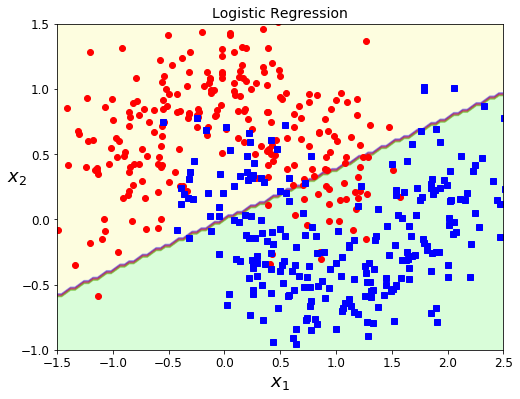

In [16]:
plt.figure(figsize=(8,6))

plt.subplot()
plot_decision_boundary(log_reg, X, y)
plt.title("Logistic Regression", fontsize=14)
plt.show()

### 3.3 Model Evalution

In [17]:
y_log_pred = log_reg.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_log_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        43
           1       0.94      0.79      0.86        57

   micro avg       0.85      0.85      0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.87      0.85      0.85       100



## 4. Training Model : DecisionTree Classifier  

### 4.1 DecisionTree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### 4.2 Visualize Logistic Classifier

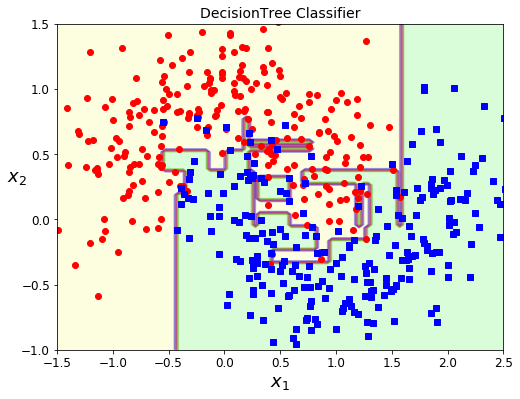

In [20]:
plt.figure(figsize=(8,6))

plt.subplot()
plot_decision_boundary(tree_clf, X, y)
plt.title("DecisionTree Classifier", fontsize=14)
plt.show()

### 4.3 Model Evalution

In [21]:
y_tree_pred = tree_clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_tree_pred))

0.82


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_tree_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        43
           1       0.90      0.77      0.83        57

   micro avg       0.82      0.82      0.82       100
   macro avg       0.82      0.83      0.82       100
weighted avg       0.83      0.82      0.82       100



## 5. Training Model : Random Forest  Classifier

### 5.1 Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### 5.2 Visualize Random Forest Classifier

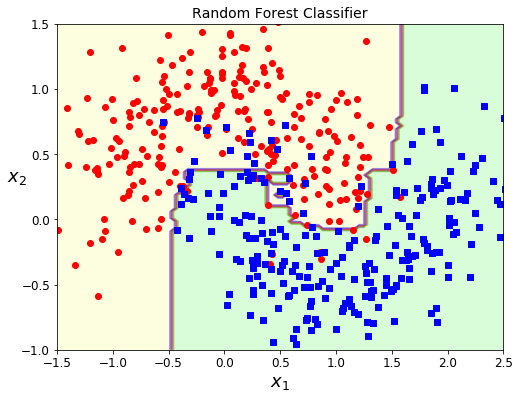

In [25]:
plt.figure(figsize=(8,6))

plt.subplot()
plot_decision_boundary(rnd_clf, X, y)

plt.title("Random Forest Classifier", fontsize=14)
plt.show()

### 5.3 Model Evalution

In [26]:
y_rnd_pred = rnd_clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_rnd_pred))

0.89


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rnd_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        43
           1       1.00      0.81      0.89        57

   micro avg       0.89      0.89      0.89       100
   macro avg       0.90      0.90      0.89       100
weighted avg       0.91      0.89      0.89       100



## 6. Training Model : Bagging (Decision Tree Classifier)

### 6.1 Bagging (DTC)

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

### 6.2 Visualize Bagging (DTC)

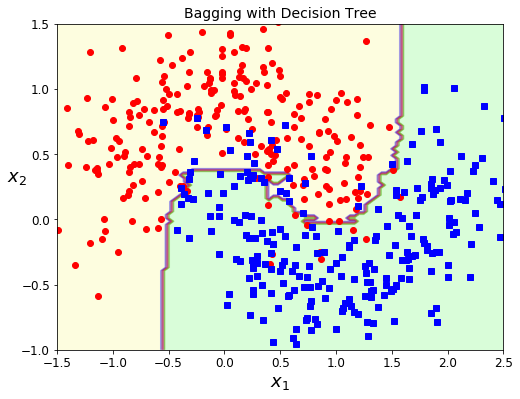

In [30]:
plt.figure(figsize=(8,6))

plt.subplot()
plot_decision_boundary(bag_clf, X, y)
plt.title("Bagging with Decision Tree", fontsize=14)
plt.show()

### 6.3 Model Evalution

In [31]:
y_bag_pred = bag_clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_bag_pred))

0.9


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_bag_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        43
           1       1.00      0.82      0.90        57

   micro avg       0.90      0.90      0.90       100
   macro avg       0.91      0.91      0.90       100
weighted avg       0.92      0.90      0.90       100



## 7. Training Model : Boosting (AdaBoost)

### 7.1 Adaboost (Decision tree)

In [34]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

### 7.2 Visualize Adaboost 

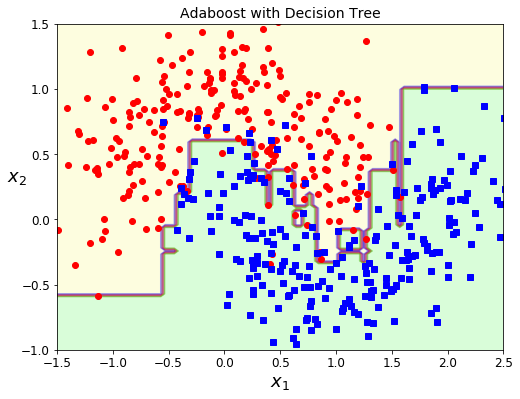

In [35]:
plt.figure(figsize=(8,6))

plt.subplot()
plot_decision_boundary(ada_clf, X, y)
plt.title("Adaboost with Decision Tree", fontsize=14)
plt.show()

### 7.3 Model Evalution

In [36]:
y_ada_pred = ada_clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_ada_pred))

0.89


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_ada_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        43
           1       1.00      0.81      0.89        57

   micro avg       0.89      0.89      0.89       100
   macro avg       0.90      0.90      0.89       100
weighted avg       0.91      0.89      0.89       100



## 8. Training Model : Boosting (Gradient Boost)

### 8.1 Gradient Boosting (Decision tree)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_clf = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### 8.2 Visualize GradientBoost

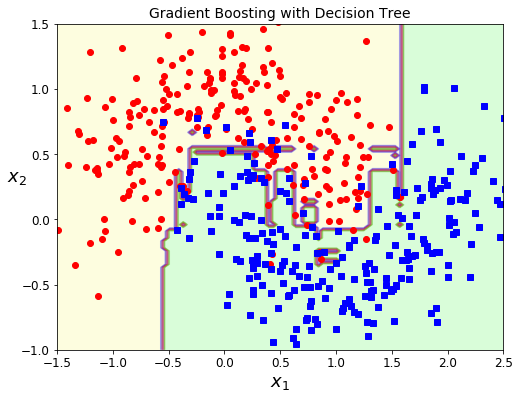

In [40]:
plt.figure(figsize=(8,6))

plt.subplot()
plot_decision_boundary(gbrt_clf, X, y)
plt.title("Gradient Boosting with Decision Tree", fontsize=14)
plt.show()

### 8.3 Model Evalution

In [41]:
y_gbrt_pred = gbrt_clf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_gbrt_pred))

0.88


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_gbrt_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88        43
           1       0.98      0.81      0.88        57

   micro avg       0.88      0.88      0.88       100
   macro avg       0.89      0.89      0.88       100
weighted avg       0.90      0.88      0.88       100

